In [1]:
#! pip install sidrapy
#! pip3 install pdfplumber

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.figsize'] = (17,6)
plt.style.use('fivethirtyeight')
import seaborn as sns
#sns.set(rc={'figure.figsize':(15,5)})
import datetime as dt
import urllib.request
import json

import pdfplumber

## Fonte dos dados (ver https://www.fulljoin.com.br/posts/2020-05-31-atas-copom/)

- Atas antiga: https://www.bcb.gov.br/api/servico/sitebcb/atascopom-conteudo/ultimas?quantidade=1000&filtro=

- Atas mais novas: https://www.bcb.gov.br/api/servico/sitebcb/atascopom/ultimas?quantidade=1000&filtro=

- A API que retorna as atas mais recentes informa o link direto de acesso ao pdf da ata no campo “Url”. 
- Já a API das atas mais antigas retorna um link com a ata em html no campo “LinkPagina”.

Os dois endpoints retornam 3 campos de interesse que iremos utilizar: DataReferencia, Titulo e Link. Dessa forma, a estratégia inicial é montar um dataframe com o link de todas as atas, antigas e novas.

In [3]:
url = 'https://www.bcb.gov.br/api/servico/sitebcb/atascopom/ultimas?quantidade=1000&filtro='

In [4]:
def consulta_ata(url):
    df = pd.read_json(url, typ = 'frame')
    return df

In [5]:
def consulta_ata2(url):
    with urllib.request.urlopen(url) as url:
        data_dict = json.load(url)   # CRia um dict a partir do json
        # extraindo para dataframe
        df = pd.DataFrame(data_dict['conteudo'])
    return df

In [6]:
df = consulta_ata2(url)
df.head(3)

,DataReferencia,ImagemCapa,Titulo,Url,LinkPagina,EsconderDataReferencia
0,2022-10-26T03:00:00Z,/content/publicacoes/PublishingImages/Capas/at...,"250ª Reunião - 25-26 outubro, 2022",/content/copom/atascopom/Copom250-not202210262...,/publicacoes/atascopom/26102022,True
1,2022-09-21T03:00:00Z,/content/publicacoes/PublishingImages/Capas/at...,"249ª Reunião - 20-21 setembro, 2022",/content/copom/atascopom/Copom249-not202209212...,/publicacoes/atascopom/21092022,True
2,2022-08-03T03:00:00Z,/content/publicacoes/PublishingImages/Capas/at...,"248ª Reunião - 2-3 agosto, 2022",/content/copom/atascopom/Copom248-not202208032...,/publicacoes/atascopom/03082022,True


In [7]:
df_filter = df[(df.LinkPagina.str.endswith('2019')) | (df.LinkPagina.str.endswith('2020')) | (df.LinkPagina.str.endswith('2021'))]

In [8]:
df_filter.shape

(24, 6)

In [9]:
df_filter.tail(3)

,DataReferencia,ImagemCapa,Titulo,Url,LinkPagina,EsconderDataReferencia
28,2019-05-08T03:00:00Z,/content/publicacoes/PublishingImages/Capas/at...,222ª Reunião,/content/copom/atascopom/COPOM222-not201905082...,/publicacoes/atascopom/08052019,None
29,2019-03-20T03:00:00Z,/content/publicacoes/PublishingImages/Capas/at...,221ª Reunião,/content/copom/atascopom/COPOM221-not201903202...,/publicacoes/atascopom/20032019,None
30,2019-02-06T02:00:00Z,/content/publicacoes/PublishingImages/Capas/at...,220ª Reunião,/content/copom/atascopom/COPOM220-not201902062...,/publicacoes/atascopom/06022019,None


In [141]:
df_filter.head(3)

,DataReferencia,ImagemCapa,Titulo,Url,LinkPagina,EsconderDataReferencia
7,2021-12-08T03:00:00Z,/content/publicacoes/PublishingImages/Capas/at...,"243ª Reunião - 7-8 dezembro, 2021",/content/copom/atascopom/Copom243-not202112082...,/publicacoes/atascopom/08122021,True
8,2021-10-27T03:00:00Z,/content/publicacoes/PublishingImages/Capas/at...,"242ª Reunião - 26-27 outubro, 2021",/content/copom/atascopom/Copom242-not202110272...,/publicacoes/atascopom/27102021,True
9,2021-09-22T03:00:00Z,/content/publicacoes/PublishingImages/Capas/at...,"241ª Reunião - 21-22 setembro, 2021",/content/copom/atascopom/Copom241-not202109222...,/publicacoes/atascopom/22092021,True


## Mas, o que interessa mesmo são as Urls que indicam onde estão os pdfs com as atas

In [10]:
lista_url = list(df_filter['Url'].values)
lista_url

['/content/copom/atascopom/Copom243-not20211208243.pdf',
 '/content/copom/atascopom/Copom242-not20211027242.pdf',
 '/content/copom/atascopom/Copom241-not20210922241.pdf',
 '/content/copom/atascopom/Copom240-not20210804240.pdf',
 '/content/copom/atascopom/Copom239-not20210616239.pdf',
 '/content/copom/atascopom/Copom238-not20210505238.pdf',
 '/content/copom/atascopom/Copom237-not20210317237.pdf',
 '/content/copom/atascopom/Copom236-not20210120236.pdf',
 '/content/copom/atascopom/Copom235-not20201209235.pdf',
 '/content/copom/atascopom/Copom234-not20201028234.pdf',
 '/content/copom/atascopom/Copom233-not20200916233.pdf',
 '/content/copom/atascopom/Copom232-not20200805232.pdf',
 '/content/copom/atascopom/Copom231-not20200617231.pdf',
 '/content/copom/atascopom/Copom230-not20200506230.pdf',
 '/content/copom/atascopom/Copom229-not20200318229.pdf',
 '/content/copom/atascopom/Copom228-not20200205228.pdf',
 '/content/copom/atascopom/Copom227-not20191211227.pdf',
 '/content/copom/atascopom/Copo

In [11]:
def download_ata(lista_url):
    lista_arq = []
    for location in lista_url:
        nome_pdf = location[location.rfind('/')+1:]
        print(nome_pdf)
        url_completo = 'https://www.bcb.gov.br'+location  
        urllib.request.urlretrieve(url_completo, nome_pdf)  # coloca o resultado em nome_pdf
        lista_arq.append(nome_pdf)
        
    return lista_arq    

In [12]:
lista_pdfs = download_ata(lista_url)

Copom243-not20211208243.pdf
Copom242-not20211027242.pdf
Copom241-not20210922241.pdf
Copom240-not20210804240.pdf
Copom239-not20210616239.pdf
Copom238-not20210505238.pdf
Copom237-not20210317237.pdf
Copom236-not20210120236.pdf
Copom235-not20201209235.pdf
Copom234-not20201028234.pdf
Copom233-not20200916233.pdf
Copom232-not20200805232.pdf
Copom231-not20200617231.pdf
Copom230-not20200506230.pdf
Copom229-not20200318229.pdf
Copom228-not20200205228.pdf
Copom227-not20191211227.pdf
Copom226-not20191030226.pdf
Copom225-not20190918225.pdf
Copom224-not20190731224.pdf
Copom223-not20190619223.pdf
COPOM222-not20190508222.pdf
COPOM221-not20190320221.pdf
COPOM220-not20190206220.pdf


# Transforma cada arquivo pdf em txt

In [13]:
def pdf_to_txt(lista_pdfs):
    for arq_pdf in lista_pdfs:
        with pdfplumber.open('./'+arq_pdf) as pdf:
            paginas = pdf.pages[2:]  # A partir da 3a página
            texto = ''
            
            for pagina in paginas:
                texto += pagina.extract_text()
                
            with open(arq_pdf.replace('pdf', 'txt'), 'w') as f:
                f.write(texto)
                

In [14]:
## Pulando o último arquivo que está com problemas
pdf_to_txt(lista_pdfs[:-1])

In [15]:
#!pip install --user -U nltk  

In [16]:
# PATH antes da modificação
!echo $PATH

/opt/conda/envs/pycaret_full/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin


In [21]:
!echo $HOME

/home/jovyan


In [18]:
!export NLTK_HOME="/opt/conda/envs/pycaret_full/lib/python3.8/site-packages"
!export PATH="$PATH:$NLTK_HOME"
!export PATH="$PATH:$HOME/.local/bin:"

In [19]:
# PATH depois da modificação
!echo $PATH

/opt/conda/envs/pycaret_full/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin


In [22]:
# Versão python usada no jupyter?
# Se for o do pycaret é 3.8.13, se for o python puro ´´e 3.9.7 (no meu computador pessoal)
sys.version      

'3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:18) \n[GCC 10.3.0]'

In [29]:
# Quais são todos os pythons e jupyters existentes?
!which -a python
!pip -V
print('')
!which -a jupyter

/opt/conda/envs/pycaret_full/bin/python
/opt/conda/bin/python
pip 22.2.2 from /opt/conda/envs/pycaret_full/lib/python3.8/site-packages/pip (python 3.8)

/opt/conda/envs/pycaret_full/bin/jupyter
/opt/conda/bin/jupyter


# Importação de nltk e dependências

In [109]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import nltk.corpus
from nltk.util import bigrams, trigrams

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Lê .txt e converte para lowercase

In [34]:
!ls *.txt

COPOM221-not20190320221.txt  Copom233-not20200916233.txt
COPOM222-not20190508222.txt  Copom234-not20201028234.txt
Copom223-not20190619223.txt  Copom235-not20201209235.txt
Copom224-not20190731224.txt  Copom236-not20210120236.txt
Copom225-not20190918225.txt  Copom237-not20210317237.txt
Copom226-not20191030226.txt  Copom238-not20210505238.txt
Copom227-not20191211227.txt  Copom239-not20210616239.txt
Copom228-not20200205228.txt  Copom240-not20210804240.txt
Copom229-not20200318229.txt  Copom241-not20210922241.txt
Copom230-not20200506230.txt  Copom242-not20211027242.txt
Copom231-not20200617231.txt  Copom243-not20211208243.txt
Copom232-not20200805232.txt


In [61]:
#from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = list(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [62]:
def le_corrige(arquivo_texto):
    with open(arquivo_texto, 'r') as f:
        texto = f.read().replace('\n','').lower() # elimina \n e converte para lowercase
    return texto

In [63]:
texto = le_corrige('COPOM221-not20190320221.txt')
print(type(texto))

<class 'str'>


In [96]:
numero_reuniao = texto[26:47]

## Distribuição de frequência dos tokens do texto

In [65]:
def dist_freq(text_string):
    word_list = word_tokenize(text_string)  # cria uma lista de tokens a partir de text_string(incluindo as stopwords)
    filtered_words = [word for word in word_list if word not in nltk.corpus.stopwords.words('portuguese')] # cria lista SEM stopwords
    freq_distrib = FreqDist(filtered_words)
    return freq_distrib, filtered_words

In [66]:
freq_distrib, filtered_words = dist_freq(texto)
freq_distrib

FreqDist({',': 103, '.': 68, 'inflação': 32, 'copom': 26, 'economia': 26, 'cenário': 21, 'política': 17, 'comitê': 17, 'taxa': 16, 'monetária': 16, ...})

In [68]:
filtered_words[0:5]

['banco', 'central', 'brasil', '221ª', 'reunião']

In [70]:
freq_distrib.most_common(10)

[(',', 103),
 ('.', 68),
 ('inflação', 32),
 ('copom', 26),
 ('economia', 26),
 ('cenário', 21),
 ('política', 17),
 ('comitê', 17),
 ('taxa', 16),
 ('monetária', 16)]

# Cria lista de palavras extras a serem excluídas

In [77]:
import string
CLEANING_LIST = list(string.punctuation) + ['2019', '2020', '2021', '2022', '2023', 'comitê', 'copom']
CLEANING_LIST = set(stopwords_list + CLEANING_LIST)
CLEANING_LIST = list(CLEANING_LIST)

In [80]:
def dist_freq2(text_string, CLEANING_LIST):
    word_list = word_tokenize(text_string)  # cria uma lista de tokens a partir de text_string(incluindo as stopwords)
    filtered_words = [word for word in word_list if word not in CLEANING_LIST] # cria lista SEM stopwords
    freq_distrib = FreqDist(filtered_words)
    return freq_distrib, filtered_words

In [81]:
freq_distrib, filtered_words = dist_freq2(texto, CLEANING_LIST)
freq_distrib

FreqDist({'inflação': 32, 'economia': 26, 'cenário': 21, 'política': 17, 'taxa': 16, 'monetária': 16, 'brasileira': 15, 'membros': 15, 'projeções': 15, 'riscos': 14, ...})

In [99]:
len(freq_distrib)   # Número de palavras distintas da ata (após filtragens)

564

In [83]:
filtered_words[0:5]

['banco', 'central', 'brasil', '221ª', 'reunião']

In [84]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Gera Wordcloud

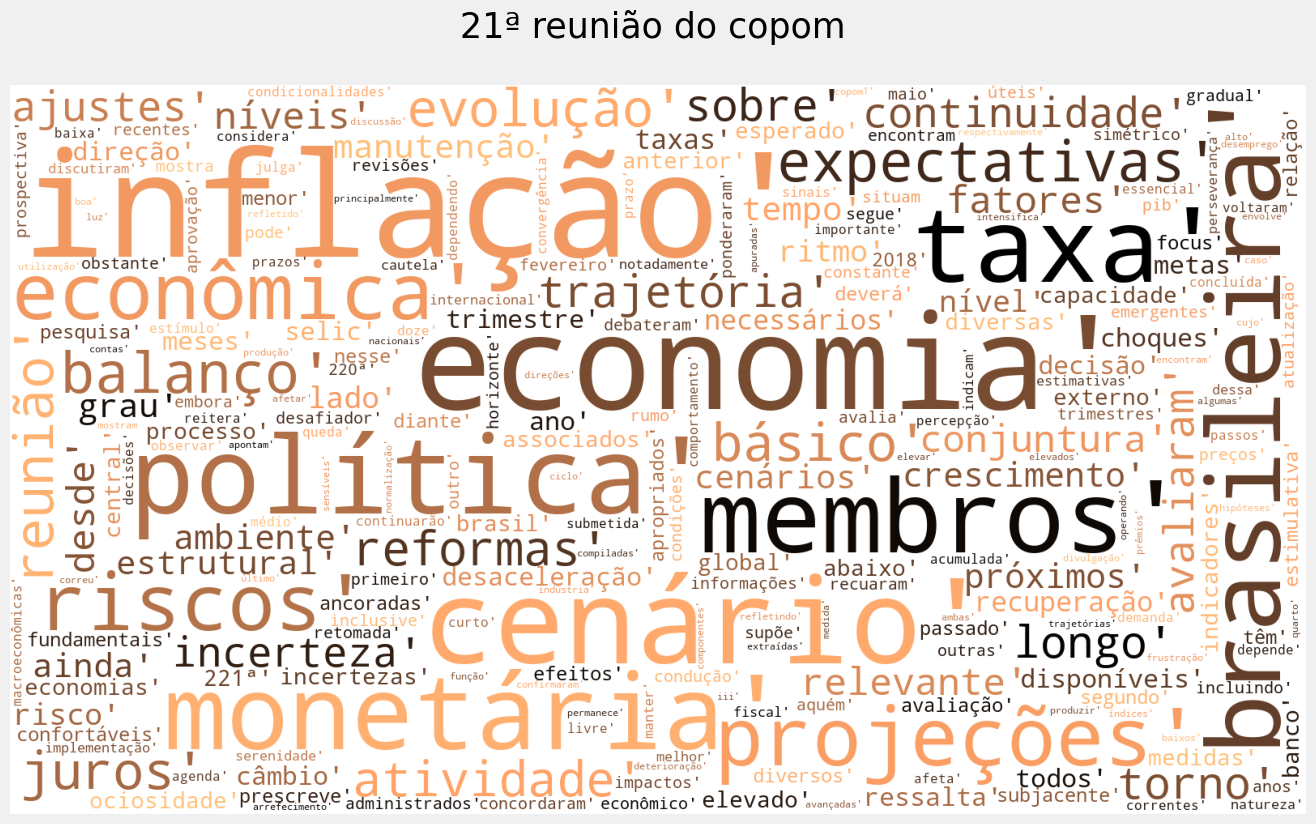

In [100]:
linha = None
wordcloud_ata = WordCloud(stopwords=CLEANING_LIST, background_color="white", 
                      colormap = 'copper', max_words = 250, width=1600, collocations = False, min_word_length = 4,#'OrRd', 'copper'
                      max_font_size = 180, height=900, random_state=123).generate(str(filtered_words))

plt.figure(figsize = (16,9)) 
plt.imshow(wordcloud_ata)#, interpolation='bilinear') 
plt.title(numero_reuniao + '\n', fontsize = 25)
plt.axis("off") 
plt.show()

# ***Última ata de 2021***

In [143]:
texto = le_corrige('Copom243-not20211208243.txt')
freq_distrib_202112, filtered_words_202112 = dist_freq2(texto, CLEANING_LIST)

In [147]:
(freq_distrib_202112)

FreqDist({'inflação': 23, 'cenário': 17, 'básico': 13, 'expectativas': 9, 'projeções': 9, 'risco': 8, 'juros': 8, 'riscos': 8, 'reunião': 7, 'atividade': 7, ...})

In [149]:
len(filtered_words_202112)  # Número de tokens nesta ata

839

In [152]:
unique_tokens = np.unique(filtered_words_202112)
len(unique_tokens)

510

# Aplicando este processo à lista de atas

In [101]:
# Cria lista com todos os arquivos txt neste diretório
import os

dir_path = os.getcwd()

lista_arquivos = []
# Iterate directory
for file in os.listdir(dir_path):
    if file.endswith('.txt'):
        lista_arquivos.append(file)

In [103]:
lista_arquivos[0:3]

['COPOM221-not20190320221.txt',
 'COPOM222-not20190508222.txt',
 'Copom223-not20190619223.txt']

# Separa a lista de arquivos em atas de 2019, 2020 e 2021

In [167]:
import re

dir_path = os.getcwd()
pattern = '2019'

lista_arquivos_2019 = []
for file in os.listdir(dir_path):
    if file.endswith('.txt'):
        x = os.path.splitext(file)
        test_string = x[0] # nome do arquivo excluindo o .txt
        result = re.search(pattern, test_string)
        if result:
            lista_arquivos_2019.append(file)     
        

In [168]:
lista_arquivos_2019

['COPOM221-not20190320221.txt',
 'COPOM222-not20190508222.txt',
 'Copom223-not20190619223.txt',
 'Copom224-not20190731224.txt',
 'Copom225-not20190918225.txt',
 'Copom226-not20191030226.txt',
 'Copom227-not20191211227.txt']

In [169]:
pattern = '2020'

lista_arquivos_2020 = []
for file in os.listdir(dir_path):
    if file.endswith('.txt'):
        x = os.path.splitext(file)
        test_string = x[0] # nome do arquivo excluindo o .txt
        result = re.search(pattern, test_string)
        if result:
            print(file)
            lista_arquivos_2020.append(file)    

Copom228-not20200205228.txt
Copom229-not20200318229.txt
Copom230-not20200506230.txt
Copom231-not20200617231.txt
Copom232-not20200805232.txt
Copom233-not20200916233.txt
Copom234-not20201028234.txt
Copom235-not20201209235.txt


In [170]:
pattern = '2021'

lista_arquivos_2021 = []
for file in os.listdir(dir_path):
    if file.endswith('.txt'):
        x = os.path.splitext(file)
        test_string = x[0] # nome do arquivo excluindo o .txt
        result = re.search(pattern, test_string)
        if result:
            print(file)
            lista_arquivos_2021.append(file) 

Copom236-not20210120236.txt
Copom237-not20210317237.txt
Copom238-not20210505238.txt
Copom239-not20210616239.txt
Copom240-not20210804240.txt
Copom241-not20210922241.txt
Copom242-not20211027242.txt
Copom243-not20211208243.txt


# Média de palavras distintas nas atas de 2019, 2020 e 2021 após retirada das stopwords e pontuação

# Em 2019

In [193]:
N = 10
dict_top_2019 = {}

for arquivo_texto in lista_arquivos_2019:
    text_2019= le_corrige(arquivo_texto)
    word_list = word_tokenize(text_2019)  # cria uma lista de tokens a partir de text_string(incluindo as stopwords)
    #filtered_words_2019 = [word for word in word_list if word not in CLEANING_LIST]  
    filtered_words_2019 = [word for word in word_list if word not in nltk.corpus.stopwords.words('portuguese')]
    freq_2019 = FreqDist([word.lower() for word in word_tokenize(text_2019) if word not in CLEANING_LIST])
    dict_top_2019[arquivo_texto.replace('.txt','')] = freq_2019.most_common(N)

print('número de palavras distintas em 2019: ', len(np.unique(filtered_words_2019)))
df_2019 = pd.DataFrame(dict_top_2019)
df_2019 = df_2019.T.sort_index()
df_2019

número de palavras distintas em 2019:  474


,0,1,2,3,4,5,6,7,8,9
COPOM221-not20190320221,"(inflação, 32)","(economia, 26)","(cenário, 21)","(política, 17)","(taxa, 16)","(monetária, 16)","(brasileira, 15)","(membros, 15)","(projeções, 15)","(riscos, 14)"
COPOM222-not20190508222,"(inflação, 32)","(economia, 26)","(cenário, 21)","(membros, 18)","(política, 16)","(monetária, 16)","(taxa, 16)","(riscos, 15)","(econômica, 15)","(brasileira, 15)"
Copom223-not20190619223,"(inflação, 34)","(economia, 25)","(cenário, 22)","(econômica, 19)","(taxa, 19)","(política, 18)","(monetária, 17)","(riscos, 15)","(projeções, 14)","(brasileira, 13)"
Copom224-not20190731224,"(inflação, 31)","(taxa, 31)","(economia, 29)","(cenário, 24)","(política, 19)","(juros, 18)","(estrutural, 18)","(monetária, 17)","(riscos, 16)","(econômica, 15)"
Copom225-not20190918225,"(inflação, 38)","(cenário, 33)","(taxa, 23)","(economia, 22)","(política, 17)","(econômica, 16)","(monetária, 16)","(projeções, 15)","(juros, 14)","(reunião, 13)"
Copom226-not20191030226,"(inflação, 31)","(cenário, 25)","(economia, 24)","(política, 21)","(monetária, 21)","(taxa, 17)","(reunião, 14)","(econômica, 13)","(sobre, 13)","(membros, 13)"
Copom227-not20191211227,"(inflação, 18)","(cenário, 16)","(economia, 14)","(política, 14)","(monetária, 14)","(taxa, 12)","(membros, 12)","(projeções, 10)","(juros, 8)","(2021., 7)"


# Em 2020

In [191]:
N = 10
dict_top_2020 = {}
for arquivo_texto in lista_arquivos_2020:
    text_2020= le_corrige(arquivo_texto)
    word_list = word_tokenize(text_2020)  # cria uma lista de tokens a partir de text_string(incluindo as stopwords)
    #filtered_words_2019 = [word for word in word_list if word not in CLEANING_LIST]  
    filtered_words_2020 = [word for word in word_list if word not in nltk.corpus.stopwords.words('portuguese')]
    freq_2020 = FreqDist([word.lower() for word in word_tokenize(text_2020) if word not in CLEANING_LIST])
    dict_top_2020[arquivo_texto.replace('.txt','')] = freq_2020.most_common(N)

print('número de palavras distintas em 2020: ', len(np.unique(filtered_words_2020)))
df_2020 = pd.DataFrame(dict_top_2020)
df_2020 = df_2020.T.sort_index()
df_2020

número de palavras distintas em 2020:  540


,0,1,2,3,4,5,6,7,8,9
Copom228-not20200205228,"(inflação, 20)","(monetária, 20)","(política, 19)","(economia, 15)","(cenário, 14)","(taxa, 11)","(membros, 10)","(projeções, 9)","(sobre, 8)","(juros, 8)"
Copom229-not20200318229,"(cenário, 14)","(inflação, 13)","(taxa, 13)","(política, 12)","(monetária, 12)","(pandemia, 11)","(economia, 11)","(sobre, 10)","(juros, 10)","(preços, 9)"
Copom230-not20200506230,"(cenário, 15)","(inflação, 15)","(sobre, 14)","(taxa, 13)","(juros, 12)","(preços, 11)","(reunião, 10)","(fiscal, 10)","(economia, 10)","(trajetória, 9)"
Copom231-not20200617231,"(cenário, 16)","(inflação, 16)","(pandemia, 13)","(sobre, 11)","(economia, 10)","(política, 9)","(monetária, 9)","(taxa, 9)","(fiscal, 8)","(básico, 7)"
Copom232-not20200805232,"(inflação, 29)","(juros, 16)","(cenário, 14)","(taxa, 13)","(sobre, 12)","(política, 12)","(projeções, 9)","(econômica, 9)","(pandemia, 9)","(economia, 9)"
Copom233-not20200916233,"(inflação, 30)","(cenário, 17)","(juros, 15)","(taxa, 13)","(sobre, 12)","(política, 12)","(economia, 10)","(monetária, 10)","(atividade, 9)","(pandemia, 9)"
Copom234-not20201028234,"(inflação, 24)","(cenário, 18)","(taxa, 13)","(juros, 13)","(sobre, 11)","(básico, 10)","(política, 10)","(monetária, 9)","(riscos, 9)","(reunião, 8)"
Copom235-not20201209235,"(inflação, 32)","(cenário, 18)","(básico, 10)","(política, 10)","(expectativas, 10)","(taxa, 10)","(juros, 10)","(projeções, 10)","(riscos, 10)","(reunião, 9)"


# Em 2021

In [192]:
N = 10
dict_top_2021 = {}

for arquivo_texto in lista_arquivos_2021:
    text_2021= le_corrige(arquivo_texto)
    word_list = word_tokenize(text_2021)  # cria uma lista de tokens a partir de text_string(incluindo as stopwords)
    #filtered_words_2019 = [word for word in word_list if word not in CLEANING_LIST]  
    filtered_words_2021 = [word for word in word_list if word not in nltk.corpus.stopwords.words('portuguese')]
    freq_2021 = FreqDist([word.lower() for word in word_tokenize(text_2021) if word not in CLEANING_LIST])
    dict_top_2021[arquivo_texto.replace('.txt','')] = freq_2021.most_common(N)
    
print('número de palavras distintas em 2021: ', len(np.unique(filtered_words_2021)))


df_2021= pd.DataFrame(dict_top_2021)
df_2021 = df_2021.T.sort_index()
df_2021

número de palavras distintas em 2021:  521


,0,1,2,3,4,5,6,7,8,9
Copom236-not20210120236,"(inflação, 26)","(cenário, 16)","(básico, 11)","(econômica, 10)","(riscos, 10)","(política, 10)","(reunião, 9)","(sobre, 9)","(monetária, 9)","(atividade, 8)"
Copom237-not20210317237,"(inflação, 26)","(cenário, 16)","(riscos, 12)","(meta, 11)","(reunião, 10)","(ano, 10)","(projeções, 10)","(taxa, 10)","(econômica, 9)","(básico, 9)"
Copom238-not20210505238,"(inflação, 23)","(cenário, 14)","(riscos, 12)","(reunião, 10)","(básico, 10)","(atividade, 9)","(projeções, 9)","(juros, 9)","(balanço, 9)","(econômica, 8)"
Copom239-not20210616239,"(inflação, 31)","(cenário, 18)","(básico, 14)","(riscos, 13)","(monetária, 12)","(projeções, 11)","(política, 11)","(reunião, 10)","(sobre, 10)","(trajetória, 10)"
Copom240-not20210804240,"(inflação, 31)","(cenário, 20)","(básico, 15)","(política, 14)","(monetária, 14)","(riscos, 12)","(sobre, 10)","(balanço, 10)","(projeções, 9)","(juros, 8)"
Copom241-not20210922241,"(inflação, 21)","(cenário, 15)","(básico, 11)","(riscos, 11)","(política, 10)","(monetária, 10)","(segundo, 8)","(juros, 8)","(balanço, 8)","(reunião, 7)"
Copom242-not20211027242,"(inflação, 26)","(cenário, 18)","(básico, 13)","(riscos, 11)","(balanço, 10)","(projeções, 9)","(reunião, 8)","(política, 8)","(monetária, 8)","(trajetória, 8)"
Copom243-not20211208243,"(inflação, 23)","(cenário, 17)","(básico, 13)","(expectativas, 9)","(projeções, 9)","(risco, 8)","(juros, 8)","(riscos, 8)","(reunião, 7)","(atividade, 7)"


# Cria dicionário com os N itens mais comuns para cada ata do Copom e repetindo o processo para todas as atas

In [123]:
N = 10

dict_top_termos = {}
for arquivo_texto in lista_arquivos[:-1]:
    texto = le_corrige(arquivo_texto)
    #filtered_words = [word for word in word_list if word not in CLEANING_LIST] # cria lista SEM stopwords
    freq_distrib = FreqDist([word.lower() for word in word_tokenize(texto) if word not in CLEANING_LIST])
    dict_top_termos[arquivo_texto.replace('.txt','')] = freq_distrib.most_common(N)
    

In [124]:
df = pd.DataFrame(dict_top_termos)
df.head(3)

,COPOM221-not20190320221,COPOM222-not20190508222,Copom223-not20190619223,Copom224-not20190731224,Copom225-not20190918225,Copom226-not20191030226,Copom227-not20191211227,Copom228-not20200205228,Copom229-not20200318229,Copom230-not20200506230,...,Copom233-not20200916233,Copom234-not20201028234,Copom235-not20201209235,Copom236-not20210120236,Copom237-not20210317237,Copom238-not20210505238,Copom239-not20210616239,Copom240-not20210804240,Copom241-not20210922241,Copom242-not20211027242
0,"(inflação, 32)","(inflação, 32)","(inflação, 34)","(inflação, 31)","(inflação, 38)","(inflação, 31)","(inflação, 18)","(inflação, 20)","(cenário, 14)","(cenário, 15)",...,"(inflação, 30)","(inflação, 24)","(inflação, 32)","(inflação, 26)","(inflação, 26)","(inflação, 23)","(inflação, 31)","(inflação, 31)","(inflação, 21)","(inflação, 26)"
1,"(economia, 26)","(economia, 26)","(economia, 25)","(taxa, 31)","(cenário, 33)","(cenário, 25)","(cenário, 16)","(monetária, 20)","(inflação, 13)","(inflação, 15)",...,"(cenário, 17)","(cenário, 18)","(cenário, 18)","(cenário, 16)","(cenário, 16)","(cenário, 14)","(cenário, 18)","(cenário, 20)","(cenário, 15)","(cenário, 18)"
2,"(cenário, 21)","(cenário, 21)","(cenário, 22)","(economia, 29)","(taxa, 23)","(economia, 24)","(economia, 14)","(política, 19)","(taxa, 13)","(sobre, 14)",...,"(juros, 15)","(taxa, 13)","(básico, 10)","(básico, 11)","(riscos, 12)","(riscos, 12)","(básico, 14)","(básico, 15)","(básico, 11)","(básico, 13)"


In [125]:
df.T.sort_index().head()

,0,1,2,3,4,5,6,7,8,9
COPOM221-not20190320221,"(inflação, 32)","(economia, 26)","(cenário, 21)","(política, 17)","(taxa, 16)","(monetária, 16)","(brasileira, 15)","(membros, 15)","(projeções, 15)","(riscos, 14)"
COPOM222-not20190508222,"(inflação, 32)","(economia, 26)","(cenário, 21)","(membros, 18)","(política, 16)","(monetária, 16)","(taxa, 16)","(riscos, 15)","(econômica, 15)","(brasileira, 15)"
Copom223-not20190619223,"(inflação, 34)","(economia, 25)","(cenário, 22)","(econômica, 19)","(taxa, 19)","(política, 18)","(monetária, 17)","(riscos, 15)","(projeções, 14)","(brasileira, 13)"
Copom224-not20190731224,"(inflação, 31)","(taxa, 31)","(economia, 29)","(cenário, 24)","(política, 19)","(juros, 18)","(estrutural, 18)","(monetária, 17)","(riscos, 16)","(econômica, 15)"
Copom225-not20190918225,"(inflação, 38)","(cenário, 33)","(taxa, 23)","(economia, 22)","(política, 17)","(econômica, 16)","(monetária, 16)","(projeções, 15)","(juros, 14)","(reunião, 13)"


In [185]:
df.T.iloc[:,0].values

array([('inflação', 32), ('inflação', 32), ('inflação', 34),
       ('inflação', 31), ('inflação', 38), ('inflação', 31),
       ('inflação', 18), ('inflação', 20), ('cenário', 14),
       ('cenário', 15), ('cenário', 16), ('inflação', 29),
       ('inflação', 30), ('inflação', 24), ('inflação', 32),
       ('inflação', 26), ('inflação', 26), ('inflação', 23),
       ('inflação', 31), ('inflação', 31), ('inflação', 21),
       ('inflação', 26)], dtype=object)

# Bigramas e Trigramas

In [153]:
N = 20   # Vai mostrar os N top bigramas

dict_top_bigrams = {}
for arquivo_texto in lista_arquivos[:-1]:
    texto = le_corrige(arquivo_texto)
    freq_distrib = FreqDist(word for word in \
                            nltk.bigrams([word for word in word_tokenize(texto) if word not in CLEANING_LIST]))
    
    dict_top_bigrams[arquivo_texto.replace('.txt','')] = freq_distrib.most_common(N)


In [154]:
df_bigrams = pd.DataFrame(dict_top_bigrams)
df_bigrams = df_bigrams.T.sort_index()
df_bigrams.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
COPOM221-not20190320221,"((política, monetária), 14)","((economia, brasileira), 13)","((balanço, riscos), 10)","((cenário, básico), 8)","((atividade, econômica), 7)","((expectativas, inflação), 7)","((reformas, ajustes), 4)","((desde, reunião), 4)","((membros, avaliaram), 4)","((taxa, juros), 4)","((taxa, selic), 4)","((básico, balanço), 4)","((banco, central), 3)","((central, brasil), 3)","((brasil, 221ª), 3)","((221ª, reunião), 3)","((trajetória, inflação), 3)","((riscos, associados), 3)","((taxas, juros), 3)","((medidas, inflação), 3)"
COPOM222-not20190508222,"((economia, brasileira), 14)","((política, monetária), 13)","((balanço, riscos), 9)","((cenário, básico), 8)","((atividade, econômica), 8)","((expectativas, inflação), 7)","((reformas, ajustes), 4)","((taxa, selic), 4)","((inflação, direção), 4)","((curto, prazo), 4)","((taxas, juros), 4)","((básico, balanço), 4)","((banco, central), 3)","((central, brasil), 3)","((brasil, 222ª), 3)","((222ª, reunião), 3)","((necessários, economia), 3)","((ociosidade, fatores), 3)","((fatores, produção), 3)","((trajetória, inflação), 3)"
Copom223-not20190619223,"((política, monetária), 15)","((balanço, riscos), 11)","((economia, brasileira), 10)","((cenário, básico), 9)","((atividade, econômica), 9)","((expectativas, inflação), 7)","((ajustes, necessários), 4)","((horizonte, relevante), 4)","((taxa, juros), 4)","((taxa, selic), 4)","((taxas, juros), 4)","((reformas, ajustes), 4)","((básico, balanço), 4)","((banco, central), 3)","((central, brasil), 3)","((brasil, 223ª), 3)","((223ª, reunião), 3)","((básico, inflação), 3)","((processo, recuperação), 3)","((necessários, economia), 3)"
Copom224-not20190731224,"((política, monetária), 17)","((economia, brasileira), 14)","((balanço, riscos), 10)","((taxa, juros), 9)","((juros, estrutural), 9)","((cenário, básico), 8)","((expectativas, inflação), 7)","((taxa, estrutural), 7)","((grau, estímulo), 6)","((banco, central), 5)","((atividade, econômica), 5)","((ajustes, necessários), 5)","((taxa, selic), 5)","((central, brasil), 4)","((brasil, 224ª), 4)","((224ª, reunião), 4)","((necessários, economia), 4)","((agenda, reformas), 4)","((reformas, ajustes), 4)","((taxas, juros), 4)"
Copom225-not20190918225,"((política, monetária), 16)","((cenário, básico), 8)","((economia, brasileira), 8)","((expectativas, inflação), 7)","((balanço, riscos), 7)","((taxa, selic), 6)","((atividade, econômica), 6)","((taxas, juros), 6)","((pesquisa, focus), 5)","((taxa, câmbio), 5)","((desde, reunião), 5)","((necessários, economia), 5)","((taxa, juros), 5)","((estímulo, monetário), 5)","((banco, central), 4)","((nesse, cenário), 4)","((projeções, inflação), 4)","((reunião, anterior), 4)","((cenário, externo), 4)","((relativamente, favorável), 4)"


In [156]:
df_bigrams.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Copom238-not20210505238,"((cenário, básico), 10)","((balanço, riscos), 9)","((política, monetária), 8)","((atividade, econômica), 5)","((horizonte, relevante), 5)","((normalização, parcial), 5)","((projeções, inflação), 4)","((básico, balanço), 4)","((238ª, reunião), 3)","((reunião, 4), 3)","((4, 5), 3)","((5, maio), 3)","((meta, inflação), 3)","((expectativas, inflação), 3)","((pesquisa, focus), 3)","((taxa, juros), 3)","((evolução, atividade), 3)","((estímulo, monetário), 3)","((“, normalização), 3)","((parcial, ”), 3)"
Copom239-not20210616239,"((cenário, básico), 14)","((política, monetária), 11)","((balanço, riscos), 8)","((atividade, econômica), 5)","((pesquisa, focus), 5)","((horizonte, relevante), 5)","((básico, balanço), 5)","((taxa, juros), 4)","((projeções, inflação), 4)","((239ª, reunião), 3)","((reunião, 15), 3)","((15, 16), 3)","((16, junho), 3)","((estímulos, monetários), 3)","((meta, inflação), 3)","((expectativas, inflação), 3)","((trajetória, política), 3)","((próxima, reunião), 3)","((estímulos, fiscais), 2)","((fiscais, monetários), 2)"
Copom240-not20210804240,"((cenário, básico), 15)","((política, monetária), 14)","((balanço, riscos), 10)","((expectativas, inflação), 6)","((pesquisa, focus), 5)","((horizonte, relevante), 5)","((básico, balanço), 5)","((reunião, 3), 4)","((atividade, econômica), 4)","((taxa, juros), 4)","((240ª, reunião), 3)","((3, 4), 3)","((4, agosto), 3)","((projeções, inflação), 3)","((relevante, política), 3)","((inflação, horizonte), 3)","((neste, momento), 3)","((inflação, economias), 2)","((economias, centrais), 2)","((cenário, prospectivo), 2)"
Copom241-not20210922241,"((cenário, básico), 11)","((política, monetária), 10)","((balanço, riscos), 8)","((horizonte, relevante), 5)","((atividade, econômica), 4)","((projeções, inflação), 4)","((mercado, trabalho), 4)","((básico, balanço), 4)","((convergência, inflação), 4)","((241ª, reunião), 3)","((reunião, 21), 3)","((21, 22), 3)","((22, setembro), 3)","((países, emergentes), 3)","((pesquisa, focus), 3)","((preços, commodities), 3)","((taxa, juros), 3)","((relevante, política), 3)","((elevação, juros), 3)","((ritmo, ajuste), 3)"
Copom242-not20211027242,"((cenário, básico), 13)","((balanço, riscos), 10)","((política, monetária), 8)","((convergência, inflação), 5)","((atividade, econômica), 4)","((projeções, inflação), 4)","((expectativas, inflação), 4)","((básico, balanço), 4)","((242ª, reunião), 3)","((reunião, 26), 3)","((26, 27), 3)","((27, outubro), 3)","((setor, serviços), 3)","((prêmios, risco), 3)","((pesquisa, focus), 3)","((taxa, juros), 3)","((contas, públicas), 3)","((inflação, metas), 3)","((1,50, ponto), 3)","((ponto, percentual), 3)"


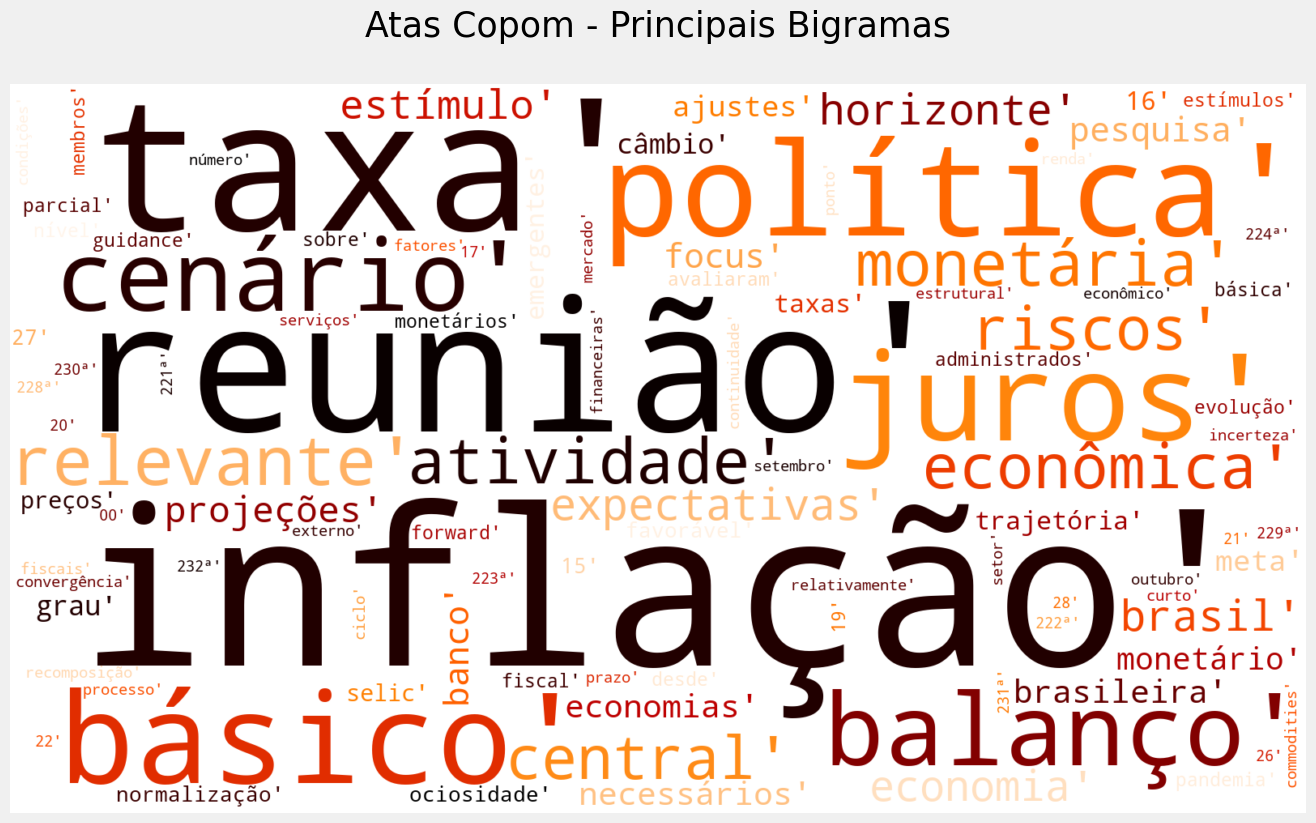

In [155]:
wordcloud_bi = WordCloud(width=1600, height=900, random_state=42, collocations = False,
                background_color ='white', colormap = 'gist_heat', max_words = 500, min_word_length = 3,
                stopwords = CLEANING_LIST, min_font_size = 15).generate(str(dict_top_bigrams.values())) 


plt.figure(figsize = (16,9)) 
plt.imshow(wordcloud_bi, interpolation='bilinear') 
plt.title('Atas Copom - Principais Bigramas\n', fontsize = 25)
plt.axis("off") 
plt.show()

In [130]:
N = 10   # Vai mostrar os N top bigramas

dict_top_trigrams = {}
for arquivo_texto in lista_arquivos[:-1]:
    texto = le_corrige(arquivo_texto)
    freq_distrib = FreqDist(word for word in \
                            nltk.trigrams([word for word in word_tokenize(texto) if word not in CLEANING_LIST]))
    
    dict_top_trigrams[arquivo_texto.replace('.txt','')] = freq_distrib.most_common(N)


In [131]:
df_trigrams = pd.DataFrame(dict_top_trigrams)
df_trigrams  = df_trigrams.T.sort_index()
df_trigrams.head()

,0,1,2,3,4,5,6,7,8,9
COPOM221-not20190320221,"((cenário, básico, balanço), 4)","((básico, balanço, riscos), 4)","((banco, central, brasil), 3)","((central, brasil, 221ª), 3)","((brasil, 221ª, reunião), 3)","((medidas, inflação, subjacente), 3)","((níveis, apropriados, confortáveis), 3)","((evolução, atividade, econômica), 3)","((reformas, ajustes, necessários), 3)","((taxa, juros, estrutural), 3)"
COPOM222-not20190508222,"((básico, balanço, riscos), 4)","((banco, central, brasil), 3)","((central, brasil, 222ª), 3)","((brasil, 222ª, reunião), 3)","((necessários, economia, brasileira), 3)","((ociosidade, fatores, produção), 3)","((inflação, direção, metas), 3)","((cenário, básico, balanço), 3)","((riscos, torno, cenário), 2)","((torno, cenário, básico), 2)"
Copom223-not20190619223,"((cenário, básico, balanço), 4)","((básico, balanço, riscos), 4)","((banco, central, brasil), 3)","((central, brasil, 223ª), 3)","((brasil, 223ª, reunião), 3)","((cenário, básico, inflação), 3)","((horizonte, relevante, política), 3)","((condução, política, monetária), 3)","((reformas, ajustes, necessários), 3)","((interrupção, processo, recuperação), 2)"
Copom224-not20190731224,"((taxa, juros, estrutural), 6)","((banco, central, brasil), 4)","((central, brasil, 224ª), 4)","((brasil, 224ª, reunião), 4)","((cenário, básico, inflação), 3)","((ajustes, necessários, economia), 3)","((necessários, economia, brasileira), 3)","((reformas, ajustes, necessários), 3)","((grau, estímulo, monetário), 3)","((juros, estrutural, economia), 3)"
Copom225-not20190918225,"((necessários, economia, brasileira), 4)","((consolidação, cenário, benigno), 4)","((banco, central, brasil), 3)","((central, brasil, 225ª), 3)","((brasil, 225ª, reunião), 3)","((taxa, câmbio, constante), 3)","((2020., nesse, cenário), 3)","((projeções, inflação, preços), 3)","((inflação, preços, administrados), 3)","((desde, reunião, anterior), 3)"


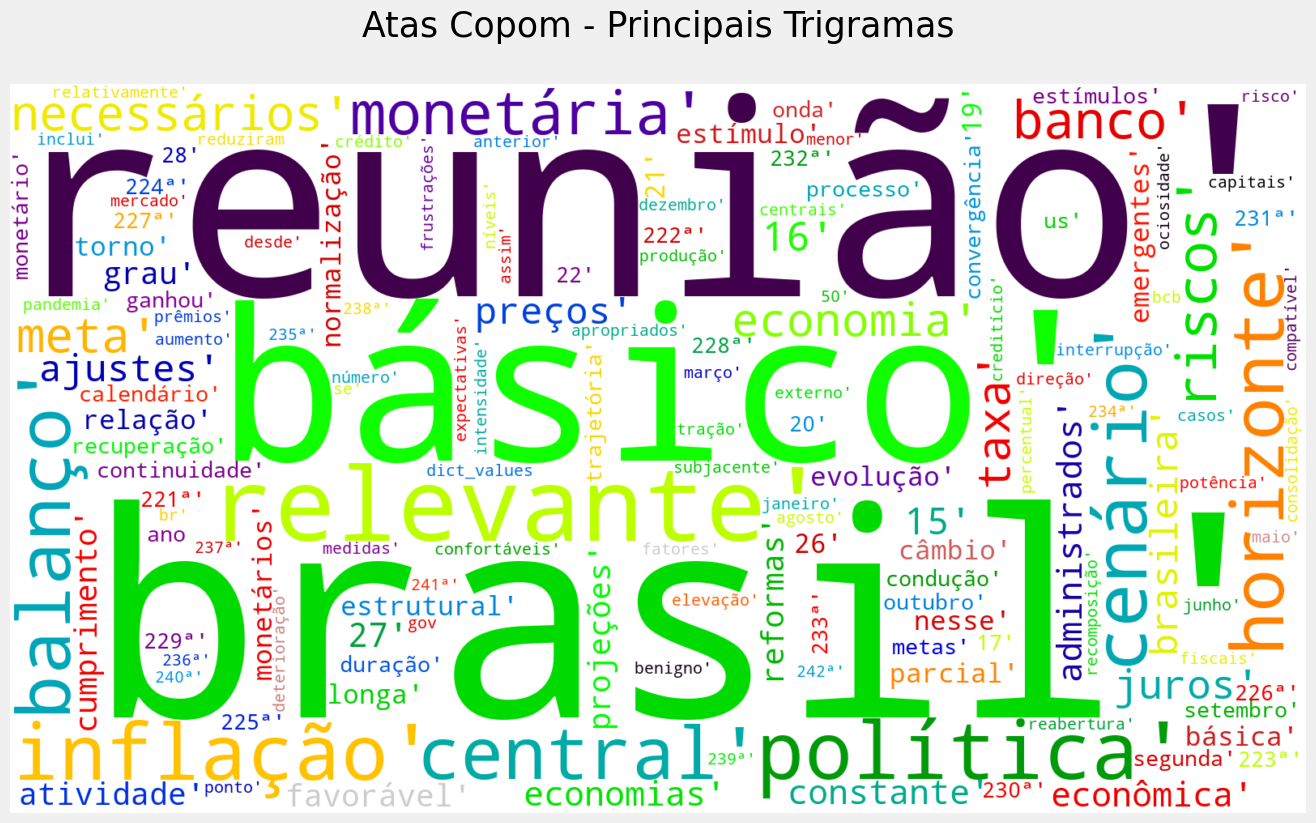

In [134]:
wordcloud_tri = WordCloud(width=1600, height=900, random_state=42, collocations = False,
                background_color ='white', colormap = 'nipy_spectral', max_words = 500, min_word_length = 3, 
                stopwords = CLEANING_LIST, min_font_size = 15).generate(str(dict_top_trigrams.values())) 

plt.figure(figsize = (16,9)) 
plt.imshow(wordcloud_tri, interpolation='bilinear') 
plt.title('Atas Copom - Principais Trigramas\n', fontsize = 25)
plt.axis("off") 
plt.show()